#  Importing Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Data Preprocessing

Load in the data

In [2]:
# Import training dataset 
train_df =pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
train_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
# Extract open column and conver to numpy array

train = train_df.iloc[:, 1:2].values
len(train)

1258

Feature Scaling

Normalization xnorm = x−min(x)/max(x)−min(x)

It is recommended to use normalization when the output layer is a sigmoid function

In [5]:
scale = MinMaxScaler(feature_range=(0,1))
train_scaled = scale.fit_transform(train)

Modify dataset to make prediction using 60 timesteps

60 past time steps are used to make the prediction at every stage

In [6]:
# 60 previous stock prices before the given day 
x_train = []
# Stock price of next day
y_train = []

for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

Reshaping the dataset

In [7]:
# Data is 2D converting it to 3D tensor for the training
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 2: Building Stacked LSTM

Initializing the RNN - LSTM

In [8]:
model = Sequential()

# Add LSTM layer
model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
# Add Regularization 
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Add output layer 
model.add(Dense(units = 1))

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model 

model.compile(optimizer= 'adam',
             loss='mean_squared_error')

In [11]:
# Train the model 
model.fit(x_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - loss: 0.0837
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0069
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0052
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0048
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0042
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0040
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0040
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/ste

# Part 3: Prediction

Prepare test data

In [12]:
test_df= pd.read_csv("Google_Stock_Price_Test.csv")
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [13]:
stock_price = test_df.iloc[:, 1:2].values

In [14]:
# Fetch 60 timesteps by combining train and test got prediction
total_df = pd.concat((train_df['Open'], test_df['Open']), axis = 0)
inputs = total_df[len(total_df) - len(test_df) -  60:].values
inputs = inputs.reshape(-1, 1)
inputs = scale.transform(inputs)

In [15]:
# Reshape the dataset

x_test = []

for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Predict stock for 2017

In [16]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


array([[0.9368237 ],
       [0.9315273 ],
       [0.93457365],
       [0.9369174 ],
       [0.9434396 ],
       [0.955114  ],
       [0.9630972 ],
       [0.9639326 ],
       [0.96406823],
       [0.9645411 ],
       [0.9650446 ],
       [0.9649614 ],
       [0.964823  ],
       [0.9663926 ],
       [0.9682168 ],
       [0.9795838 ],
       [0.99281764],
       [1.0052643 ],
       [1.0088089 ],
       [0.9950401 ]], dtype=float32)

In [17]:
predicted_stock_price = scale.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[782.71893],
       [779.8718 ],
       [781.5094 ],
       [782.7693 ],
       [786.2754 ],
       [792.5511 ],
       [796.8425 ],
       [797.2916 ],
       [797.3645 ],
       [797.61865],
       [797.88934],
       [797.8446 ],
       [797.7702 ],
       [798.614  ],
       [799.5946 ],
       [805.7051 ],
       [812.81903],
       [819.5098 ],
       [821.4153 ],
       [814.0138 ]], dtype=float32)

# Visualization

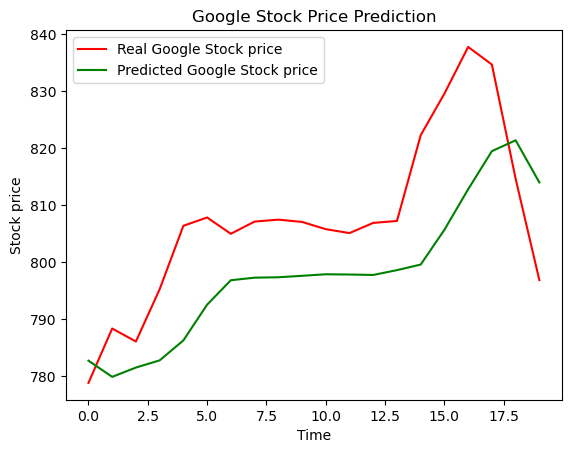

In [18]:
plt.plot(stock_price, color = 'red', label = 'Real Google Stock price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

# Evaluation

In [19]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(stock_price, predicted_stock_price))

In [20]:
print(f"Mean square error : {rmse}")

Mean square error : 13.81249110572737


[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


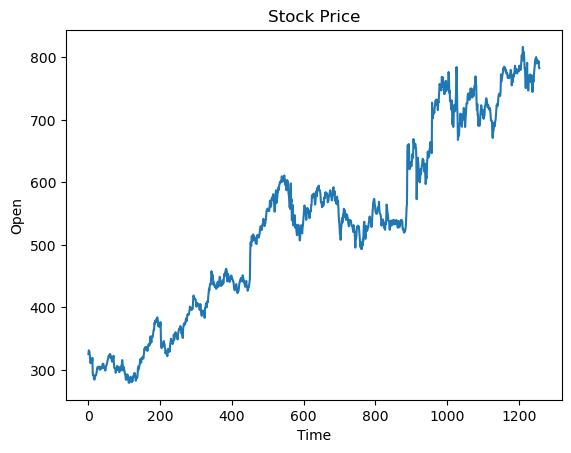

In [21]:
data = train_df.loc[:,["Open"]].values
print(data)

plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Open")
plt.title("Stock Price")
plt.show()